# Preparing data for clustering 

* We want to create clusters to find the top predictor of each cluster
* To do this we want our data split into seasons 
* In this notebook I'll do that preprocessing in python as it's a more familiar tool than R 

In [1]:
import iris 
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [2]:
cube = iris.load_cube('../data/netcdf/ERA5_tas_monthly_1979_2019.nc')

In [3]:
cube

<iris 'Cube' of monthly_mean_2_metre_temperature / (celsius) (time: 492; latitude: 721; longitude: 1440)>

Add yearly and seasonal coordinates so we can extract and take an average 

In [4]:
iris.coord_categorisation.add_month(cube, 'time', name='month')
iris.coord_categorisation.add_year(cube, 'time', name='year')
iris.coord_categorisation.add_season(cube, 'time', name='season')

In [5]:
def extract_relevent_season(cube, season_name):
    constraint = iris.Constraint(season = season_name)
    return cube.extract(constraint)

Starting with summer

In [6]:
season_cube = extract_relevent_season(cube, 'jja')

Take the yearly mean to get the JJA average each year 

In [7]:
season_cube = season_cube.aggregated_by(['year'], iris.analysis.MEAN)

In [8]:
season_cube

Monthly Mean 2 Metre Temperature (celsius),time,latitude,longitude
Shape,41,721,1440
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Auxiliary coordinates,,,
month,x,-,-
season,x,-,-
year,x,-,-
Cell methods,,,


## cut down the data 

Cutting the data to a 'shortglobe' to cut the data size down slightly

In [9]:
lat_min = -70
lat_max = 80
lon_min = 0
lon_max = 360

lat_constraint = iris.Constraint(latitude=lambda cell: lat_min < cell < lat_max)
lon_constraint = iris.Constraint(longitude=lambda cell: lon_min < cell < lon_max)

Cutting the data down to the current period we have 

In [10]:
period_constraint = iris.Constraint(coord_values={'year':lambda cell: 1981 <= cell <= 2016})

Use the created constraints to extract the correct data 

In [11]:
season_cube_cut = season_cube.extract(period_constraint & lat_constraint & lon_constraint)

In [12]:
season_cube_cut

Monthly Mean 2 Metre Temperature (celsius),time,latitude,longitude
Shape,36,599,1439
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Auxiliary coordinates,,,
month,x,-,-
season,x,-,-
year,x,-,-
Cell methods,,,


R package we are using requires the longitudes to go from -180 to 180

In [13]:
season_cube_cut = season_cube_cut.intersection(longitude=(-180, 180))

Save the data 

In [14]:
iris.save(season_cube_cut, '../data/netcdf/tas_jja_1981_2016_intersected_shortglobe.nc')

Visualise just to check nothing silly has happened

/data/users/ncreaser/Conda/cssp_china1/lib/python3.11/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/data/users/ncreaser/Conda/cssp_china1/lib/python3.11/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


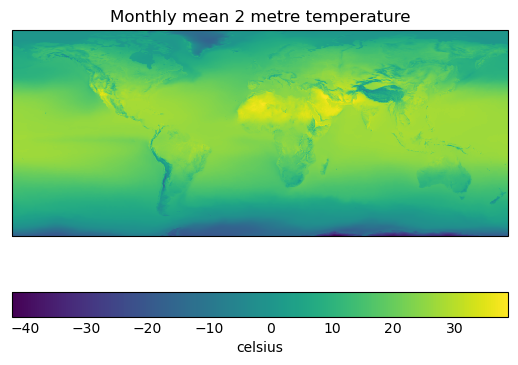

In [15]:
qplt.pcolormesh(season_cube_cut[0])